<a href="https://colab.research.google.com/github/KenkiCZ/google_notebooks/blob/main/C104_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Programming/C104_Seaborn-Scikit/cost_revenue_dirty.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Notebook Presentation

In [10]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [20]:
print(f"Number of rows: {df.shape[0]} and columns: {df.shape[1]} \n")
print(f"There are {df.isnull().sum().sum()} missing values \n")
print(f"There are {df.duplicated().sum()} duplicated values \n")
print(f"There are {df.dtypes}")
df.head(10)

Number of rows: 5391 and columns: 6 

There are 0 missing values 

There are 0 duplicated values 

There are Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
5,4250,12/30/1925,Ben-Hur,"$3,900,000","$9,000,000","$9,000,000"
6,4630,12/8/1927,Wings,"$2,000,000",$0,$0
7,5141,1/2/1929,The Broadway Melody,"$379,000","$4,358,000","$2,800,000"
8,4240,1/1/1930,Hell's Angels,"$4,000,000",$0,$0
9,5043,12/31/1931,Mata Hari,"$558,000","$900,000","$900,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [40]:
df[["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]] = df[["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]].applymap(lambda x: x.replace(",", "").replace("$", "")).astype(float)
# Using applymap:
# applymap applies a function to every element of the DataFrame. This can be very efficient and straightforward if you have a simple replacement to apply to every cell of the DataFrame.
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_Data
0,5293,8/2/1915,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1915-08-02
1,5140,5/9/1916,Intolerance,"385,907.00",0.00,0.00,1916-05-09
2,5230,12/24/1916,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1916-12-24
3,5299,9/17/1920,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920-09-17
4,5222,1/1/1925,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1925-01-01
...,...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"15,000,000.00",0.00,0.00,2018-10-08
5387,126,12/18/2018,Aquaman,"160,000,000.00",0.00,0.00,2018-12-18
5388,96,12/31/2020,Singularity,"175,000,000.00",0.00,0.00,2020-12-31
5389,1119,12/31/2020,Hannibal the Conqueror,"50,000,000.00",0.00,0.00,2020-12-31


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [84]:
df["Release_Data"] = pd.to_datetime(df["Release_Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   object        
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   float64       
 4   USD_Worldwide_Gross    5391 non-null   float64       
 5   USD_Domestic_Gross     5391 non-null   float64       
 6   Release_Data           5391 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 294.9+ KB


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [65]:
print(f"The average movie production budget is {round(df['USD_Production_Budget'].mean(), 2)}$")
print(f"The average movie worldwide gross is {round(df['USD_Worldwide_Gross'].mean(), 2)}$")
print(f"The minimums for ww and domestic revenue were {df['USD_Worldwide_Gross'].min()}$ and {df['USD_Domestic_Gross'].min()}$")
print(f"{df['USD_Worldwide_Gross'].quantile(.25) - df['USD_Production_Budget'].quantile(.25)}$ was the overall income from this movie")
print(f"The highest prduction budget was {df['USD_Production_Budget'].max()}$ and  highest worldwide gross was {df['USD_Worldwide_Gross'].max()}$")
print(f"The highest revenue was {df['USD_Worldwide_Gross'].max() - df['USD_Production_Budget'].max()}$ and the lowest revenue was {df['USD_Worldwide_Gross'].min() - df['USD_Production_Budget'].min()}$")

# or just
df[["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]].describe()

The average movie production budget is 31113737.58$
The average movie worldwide gross is 88855421.96$
The minimums for ww and domestic revenue were 0.0$ and 0.0$
-1134794.0$ was the overall income from this movie
The highest prduction budget was 425000000.0$ and  highest worldwide gross was 2783918982.0$
The highest revenue was 2358918982.0$ and the lowest revenue was -1100.0$


,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00"
mean,"31,113,737.58","88,855,421.96","41,235,519.44"
std,"40,523,796.88","168,457,757.00","66,029,346.27"
min,"1,100.00",0.00,0.00
25%,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [70]:
df[df["USD_Domestic_Gross"]==0].sort_values("USD_Production_Budget" ,ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_Data
5388,96,12/31/2020,Singularity,"175,000,000.00",0.00,0.00,2020-12-31
5387,126,12/18/2018,Aquaman,"160,000,000.00",0.00,0.00,2018-12-18
5384,321,9/3/2018,A Wrinkle in Time,"103,000,000.00",0.00,0.00,2018-09-03
5385,366,10/8/2018,Amusement Park,"100,000,000.00",0.00,0.00,2018-10-08
5090,556,12/31/2015,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00,2015-12-31
...,...,...,...,...,...,...,...
4787,5371,12/31/2014,Stories of Our Lives,"15,000.00",0.00,0.00,2014-12-31
3056,5374,12/31/2007,Tin Can Man,"12,000.00",0.00,0.00,2007-12-31
4907,5381,5/19/2015,Family Motocross,"10,000.00",0.00,0.00,2015-05-19
5006,5389,9/29/2015,Signed Sealed Delivered,"5,000.00",0.00,0.00,2015-09-29


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [72]:
df[df["USD_Worldwide_Gross"]==0].sort_values("USD_Production_Budget" ,ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_Data
5388,96,12/31/2020,Singularity,"175,000,000.00",0.00,0.00,2020-12-31
5387,126,12/18/2018,Aquaman,"160,000,000.00",0.00,0.00,2018-12-18
5384,321,9/3/2018,A Wrinkle in Time,"103,000,000.00",0.00,0.00,2018-09-03
5385,366,10/8/2018,Amusement Park,"100,000,000.00",0.00,0.00,2018-10-08
5058,880,11/12/2015,The Ridiculous 6,"60,000,000.00",0.00,0.00,2015-11-12
...,...,...,...,...,...,...,...
4787,5371,12/31/2014,Stories of Our Lives,"15,000.00",0.00,0.00,2014-12-31
3056,5374,12/31/2007,Tin Can Man,"12,000.00",0.00,0.00,2007-12-31
4907,5381,5/19/2015,Family Motocross,"10,000.00",0.00,0.00,2015-05-19
5006,5389,9/29/2015,Signed Sealed Delivered,"5,000.00",0.00,0.00,2015-09-29


### Filtering on Multiple Conditions

In [76]:
df.loc[(df['USD_Domestic_Gross'] == 0) & (df['USD_Worldwide_Gross'] != 0)] # Here we are using bitwise operators

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_Data
71,4310,2/16/1956,Carousel,"3,380,000.00","3,220.00",0.00,1956-02-16
1579,5087,2/11/2001,Everything Put Together,"500,000.00","7,890.00",0.00,2001-02-11
1744,3695,12/31/2001,The Hole,"7,500,000.00","10,834,406.00",0.00,2001-12-31
2155,4236,12/31/2003,Nothing,"4,000,000.00","63,180.00",0.00,2003-12-31
2203,2513,3/31/2004,The Touch,"20,000,000.00","5,918,742.00",0.00,2004-03-31
...,...,...,...,...,...,...,...
5340,1506,4/14/2017,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00,2017-04-14
5348,2225,5/5/2017,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00,2017-05-05
5360,4832,7/3/2017,Departure,"1,100,000.00","27,561.00",0.00,2017-07-03
5372,1856,8/25/2017,Ballerina,"30,000,000.00","48,048,527.00",0.00,2017-08-25


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [77]:
df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_Data
71,4310,2/16/1956,Carousel,"3,380,000.00","3,220.00",0.00,1956-02-16
1579,5087,2/11/2001,Everything Put Together,"500,000.00","7,890.00",0.00,2001-02-11
1744,3695,12/31/2001,The Hole,"7,500,000.00","10,834,406.00",0.00,2001-12-31
2155,4236,12/31/2003,Nothing,"4,000,000.00","63,180.00",0.00,2003-12-31
2203,2513,3/31/2004,The Touch,"20,000,000.00","5,918,742.00",0.00,2004-03-31
...,...,...,...,...,...,...,...
5340,1506,4/14/2017,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00,2017-04-14
5348,2225,5/5/2017,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00,2017-05-05
5360,4832,7/3/2017,Departure,"1,100,000.00","27,561.00",0.00,2017-07-03
5372,1856,8/25/2017,Ballerina,"30,000,000.00","48,048,527.00",0.00,2017-08-25


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [101]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
df[df["Release_Data"]>scrape_date] # Films Released after 2018-5-1
print(len(df[df["Release_Data"]>scrape_date]))
data_clean = df[df["Release_Data"]<scrape_date]
data_clean

7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_Data
0,5293,8/2/1915,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1915-08-02
1,5140,5/9/1916,Intolerance,"385,907.00",0.00,0.00,1916-05-09
2,5230,12/24/1916,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1916-12-24
3,5299,9/17/1920,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920-09-17
4,5222,1/1/1925,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1925-01-01
...,...,...,...,...,...,...,...
5379,1295,10/2/2017,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00",2017-10-02
5380,70,10/3/2017,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00",2017-10-03
5381,94,12/5/2017,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00",2017-12-05
5382,1254,12/5/2017,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00",2017-12-05


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [113]:
print(round(data_clean.query('USD_Worldwide_Gross < USD_Production_Budget').shape[0] / data_clean.shape[0] *100, 2), "%")

37.28 %


# Seaborn for Data Viz: Bubble Charts

In [114]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [143]:
# Ensure to use .loc to avoid the SettingWithCopyWarning
data_clean.loc[:, "Release_Date"] = pd.to_datetime(data_clean["Release_Date"])
data_clean["Release_Date"]

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5379   2017-10-02
5380   2017-10-03
5381   2017-12-05
5382   2017-12-05
5383   2017-12-31
Name: Release_Date, Length: 5384, dtype: datetime64[ns]

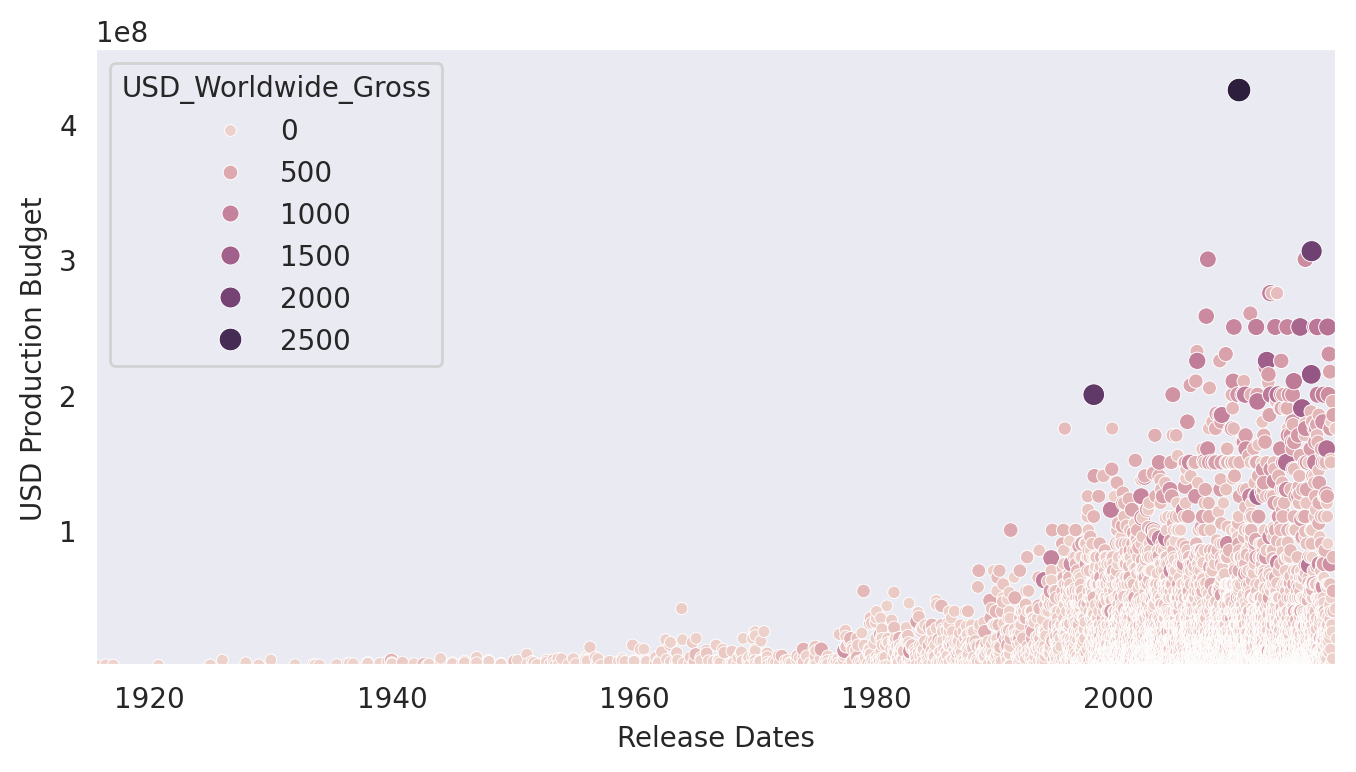

In [150]:
fig = plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("dark"):
  ax = sns.scatterplot(data = data_clean,
                       x ='Release_Date',
                       y = 'USD_Production_Budget',
                       hue=data_clean['USD_Worldwide_Gross']/1000000,
                       size=data_clean['USD_Worldwide_Gross']/1000000)

  ax.set(ylabel='USD Production Budget',
         xlabel='Release Dates',
         xlim=(data_clean['Release_Date'].min(),
               data_clean['Release_Date'].max()),
         ylim=(data_clean['USD_Production_Budget'].min(),
               data_clean['USD_Production_Budget'].max()+30000000))

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [153]:
data_clean.loc[:,"Decade"] = data_clean["Release_Date"].dt.year - (data_clean["Release_Date"].dt.year % 10)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_Data,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1915-08-02,1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,1916-05-09,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1916-12-24,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920-09-17,1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1925-01-01,1920
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00",2017-10-02,2010
5380,70,2017-10-03,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00",2017-10-03,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00",2017-12-05,2010
5382,1254,2017-12-05,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00",2017-12-05,2010


In [156]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date) # Create DatetimeIndex from Release_Date
years = dt_index.year
years

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [163]:
old_films = data_clean[data_clean["Decade"]<1970]
new_films = data_clean[data_clean["Decade"]>=1970]
print(f"Old Films: {len(old_films)}, New Films: {len(new_films)}")
print(f"{old_films['USD_Production_Budget'].max()}$")

Old Films: 153, New Films: 5231
42000000.0$


# Seaborn Regression Plots

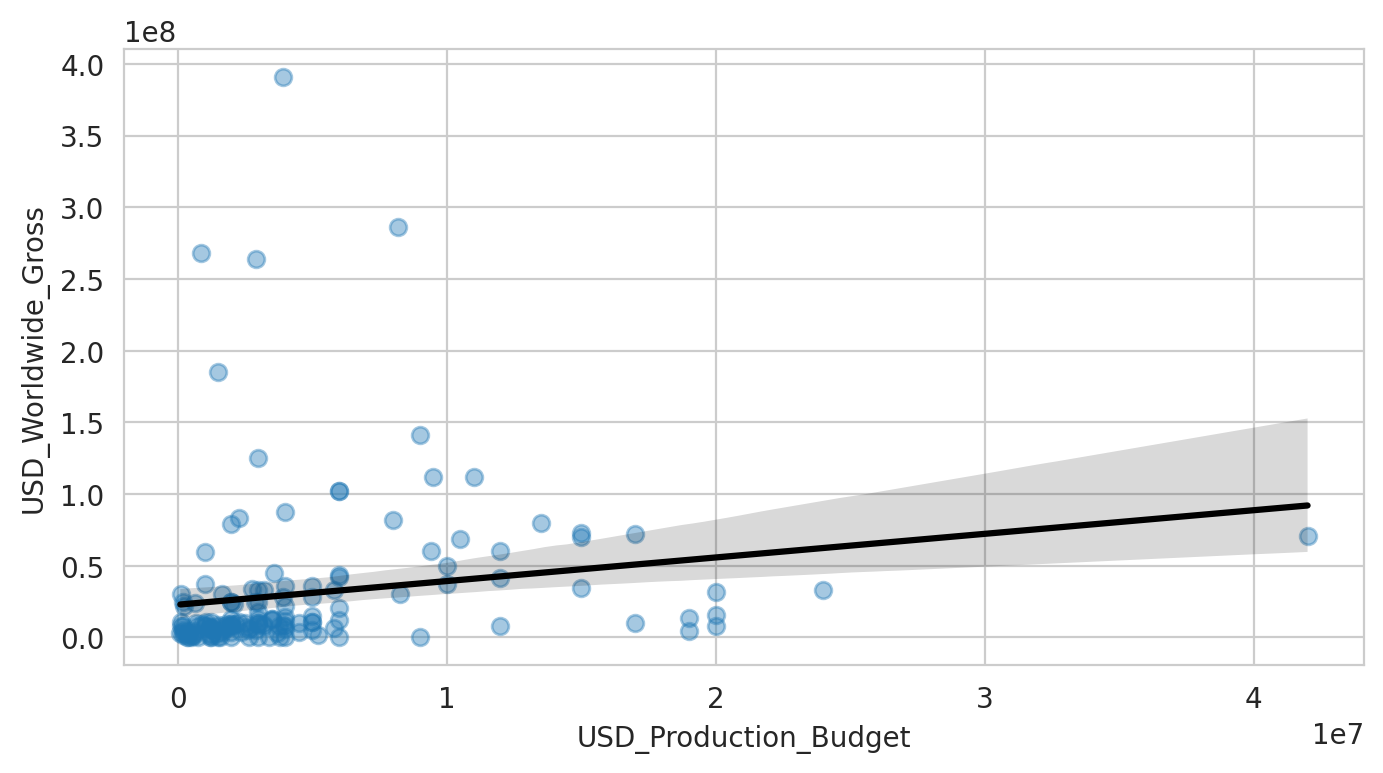

In [166]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

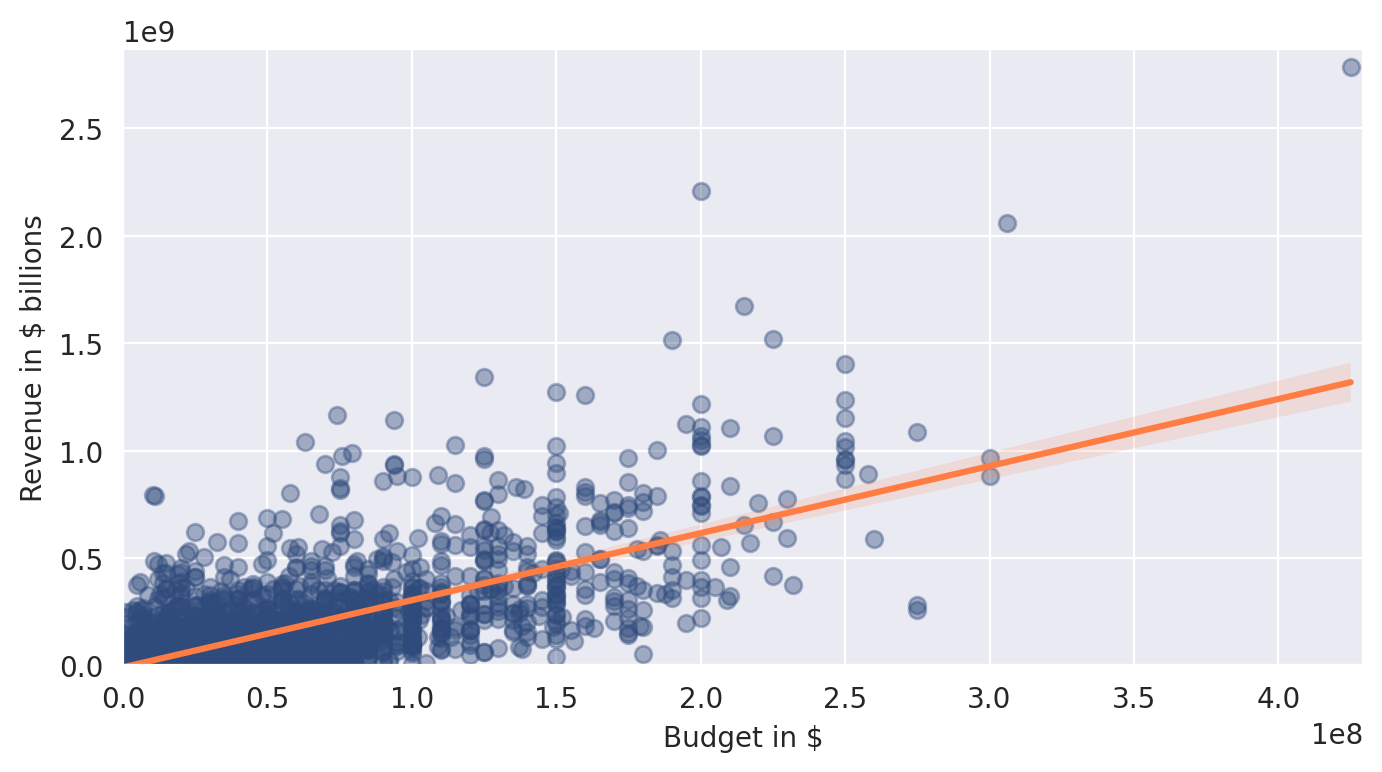

In [175]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4, "color":"#2f4b7c"},
            line_kws = {'color': '#ff7c43'})
  ax.set(xlim=(0, new_films["USD_Production_Budget"].max()*1.01), ylim=(0, new_films["USD_Worldwide_Gross"].max()*1.03), xlabel='Budget in $', ylabel='Revenue in $ billions')

  # 1) Yes, the linear regression is better then with old films
  # 2) Film would make around 0.5 billion in revenue

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [182]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
Y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, Y)

print(regression.coef_[0][0]) # Theta 1
print(regression.intercept_[0]) # Theta 0
print(regression.score(X, Y)*100,"%") # R^2 whuich is the correctess of the model

3.1225959173210933
-8650768.006610274
55.77032617720403 %


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [190]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
Y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, Y)

print(regression.coef_[0][0]) # Theta 1
print(regression.intercept_[0]) # Theta 0
print(regression.score(X, Y)*100,"%") # R^2 whuich is the correctess of the model

1.6477131440107315
22821538.635080386
2.937258620576877 %


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [192]:
from math import pow
regression.coef_[0][0] * 350 + (regression.intercept_[0]/pow(10,6))

599.5211390388364

In [193]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
